In [1]:
#Importing Functions, Libraries and Viz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydataset
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.preprocessing

import warnings
warnings.filterwarnings("ignore")

from math import sqrt
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

# from linear_model: LinearRegression (OLS), LassoLars, TweedieRegressor (Generalized Linear Model)
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor

import env
import os
#import acquire_zillow
#import prepare
#my wrangle file 
import wrangle

In [2]:
#acquire data
df = wrangle.get_zillow_data()
df

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
0,2.0,1.0,1174.0,155395.0,1937.0,6037.0
1,5.0,3.0,2299.0,283765.0,1977.0,6037.0
2,2.0,1.5,1008.0,332406.0,1964.0,6059.0
3,6.0,5.5,4041.0,1587088.0,2005.0,6059.0
4,2.0,2.0,1064.0,231539.0,1964.0,6059.0
...,...,...,...,...,...,...
52436,3.0,2.0,1060.0,535751.0,1954.0,6037.0
52437,3.0,3.0,1813.0,233667.0,1988.0,6037.0
52438,3.0,2.0,1820.0,599893.0,1962.0,6037.0
52439,3.0,2.0,2049.0,664000.0,2005.0,6111.0


In [3]:
#check shape
df.shape

(52441, 6)

In [4]:
#show info with counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52441 entries, 0 to 52440
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    52441 non-null  float64
 1   bathroomcnt                   52441 non-null  float64
 2   calculatedfinishedsquarefeet  52359 non-null  float64
 3   taxvaluedollarcnt             52440 non-null  float64
 4   yearbuilt                     52325 non-null  float64
 5   fips                          52441 non-null  float64
dtypes: float64(6)
memory usage: 2.8 MB


In [5]:
#look at dataframe
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
0,2.0,1.0,1174.0,155395.0,1937.0,6037.0
1,5.0,3.0,2299.0,283765.0,1977.0,6037.0
2,2.0,1.5,1008.0,332406.0,1964.0,6059.0
3,6.0,5.5,4041.0,1587088.0,2005.0,6059.0
4,2.0,2.0,1064.0,231539.0,1964.0,6059.0


In [6]:
#check for nulls
df.isnull().any()

bedroomcnt                      False
bathroomcnt                     False
calculatedfinishedsquarefeet     True
taxvaluedollarcnt                True
yearbuilt                        True
fips                            False
dtype: bool

In [7]:
#check for nulls
df.isnull().sum()

bedroomcnt                        0
bathroomcnt                       0
calculatedfinishedsquarefeet     82
taxvaluedollarcnt                 1
yearbuilt                       116
fips                              0
dtype: int64

In [8]:
#check & remove outliers function
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df
 

In [9]:
df = remove_outliers(df,1.5,['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt'])


In [10]:
#clean data 
df

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
0,2.0,1.0,1174.0,155395.0,1937.0,6037.0
1,5.0,3.0,2299.0,283765.0,1977.0,6037.0
2,2.0,1.5,1008.0,332406.0,1964.0,6059.0
4,2.0,2.0,1064.0,231539.0,1964.0,6059.0
6,4.0,2.0,2058.0,1070530.0,1960.0,6059.0
...,...,...,...,...,...,...
52436,3.0,2.0,1060.0,535751.0,1954.0,6037.0
52437,3.0,3.0,1813.0,233667.0,1988.0,6037.0
52438,3.0,2.0,1820.0,599893.0,1962.0,6037.0
52439,3.0,2.0,2049.0,664000.0,2005.0,6111.0


In [11]:
#check for nulls
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
fips                            0
dtype: int64

In [12]:
#clean data with renamed columns for readability 
df = wrangle.clean_zillow_data()
df

,bedrooms,bathrooms,area,assessed_value,year_built,county
0,2.0,1.0,1174.0,155395.0,1937.0,Los_Angeles
1,5.0,3.0,2299.0,283765.0,1977.0,Los_Angeles
2,2.0,1.5,1008.0,332406.0,1964.0,Orange
4,2.0,2.0,1064.0,231539.0,1964.0,Orange
6,4.0,2.0,2058.0,1070530.0,1960.0,Orange
...,...,...,...,...,...,...
52436,3.0,2.0,1060.0,535751.0,1954.0,Los_Angeles
52437,3.0,3.0,1813.0,233667.0,1988.0,Los_Angeles
52438,3.0,2.0,1820.0,599893.0,1962.0,Los_Angeles
52439,3.0,2.0,2049.0,664000.0,2005.0,Ventura


In [13]:
# this function is splitting data to train, validate, and test to avoid data leakage
def split_data(df):
    '''
    This function performs split on zillow data, stratify assesed value.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123) 
                                            
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123) 
                                    
    return train, validate, test


In [14]:
#Split data
train_validate, test = train_test_split(df, train_size = 0.2, random_state=123)
train, validate = train_test_split(train_validate, train_size = 0.3, random_state=123)
train.shape, validate.shape, test.shape

((2827, 6), (6597, 6), (37697, 6))

In [15]:
train.head()

,bedrooms,bathrooms,area,assessed_value,year_built,county
45903,3.0,1.0,936.0,449000.0,1947.0,Los_Angeles
21951,3.0,1.0,1242.0,502233.0,1929.0,Los_Angeles
8637,3.0,1.5,1524.0,383119.0,1954.0,Orange
14763,3.0,3.0,1635.0,307538.0,1990.0,Orange
37559,4.0,2.0,1599.0,340693.0,1966.0,Orange


In [16]:
#check statistical nature of the data
train.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,2827.0,3.244429,0.874685,0.0,3.0,3.0,4.0,7.0
bathrooms,2827.0,2.147329,0.773062,0.0,2.0,2.0,3.0,5.0
area,2827.0,1748.261762,670.326708,440.0,1242.0,1601.0,2150.5,3857.0
assessed_value,2827.0,384119.482490,256644.005093,13198.0,178044.0,337567.0,535508.0,1160000.0
year_built,2827.0,1962.835515,21.397913,1910.0,1950.0,1960.0,1977.0,2015.0


## Exploration

### Initial questions
#### 1. Does the number of bedrooms & bathrooms in a house influence the price of the home?
#### 2. Does size/area of the house  influence the price of the home?
#### 3. Does the age of the house influence the price of the home?
#### 4. Does the location of the house influence the price of the home?

## 1.  Does the number of bedrooms & bathrooms in a house influence the price of the home?


### Statistical test

In [17]:
a = 0.05

#### H0 : There is  no relationship between number of bedrooms & bathrooms to home prices
#### Ha : There is  a relationship between number of bedrooms & bathrooms to home prices

In [18]:
# this statistical test takes in the number of bedrooms to assessed value and 
# returns the correlation and p value to determine the statistical significance to alpha
x = train.bedrooms
y = train.assessed_value

corr, p = stats.pearsonr(x, y)
print(f'corr = {corr:.5f}')
print(f'p = {p:.5f}')

if p<a:
    print(f"reject the null hypothesis")
else:
    print(f"reject the null hypothesis")

corr = 0.23146
p = 0.00000
reject the null hypothesis


In [19]:
# this statistical test takes in the number of bathrooms to assessed value and 
# returns the correlation and p value to determine the statistical significance to alpha
x = train.bathrooms
y = train.assessed_value

corr, p = stats.pearsonr(x, y)
print(f'corr = {corr:.5f}')
print(f'p = {p:.5f}')

if p<a:
    print(f"reject the null hypothesis")
else:
    print(f"reject the null hypothesis")

corr = 0.41196
p = 0.00000
reject the null hypothesis


### Plot

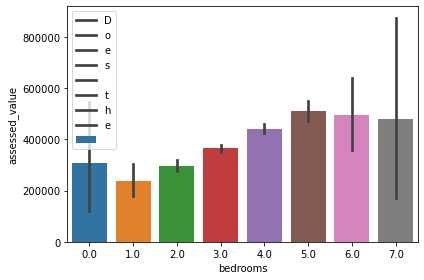

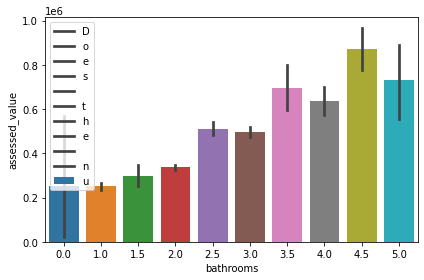

In [20]:
#make my target train assessed value and check relationship of bedrooms & bathrooms to price of home
target = train.assessed_value
train_drop = train.drop(columns=["area","assessed_value","year_built","county"])

# plot independent variables against dependent variables
for col in train_drop:
    sns.barplot(x=train_drop[col], y=target, data=train_drop)
    plt.ylabel('assessed_value')
    plt.xlabel(col)
    plt.legend("Does the number of bed/bathrooms in house influence price of home?")
    plt.tight_layout()
    plt.show()

### takeaways
### - We can see that there is a positive correlation between the number of bedrooms and bathrooms to the cost of the house
### - The more the number of bedrooms and bathrooms the higher the price of homes



## 2.  Does size/area of the house influence the price of the home?


### Statistical test

In [21]:
a = 0.05

#### H0 : There is no relationship between size of house to home prices
#### Ha : There is a relationship between size of house to home prices

In [22]:
# this statistical test takes in the size of houses to assessed value and 
# returns the correlation and p value to determine the statistical significance to alpha
x= train["area"]
y = train["assessed_value"]
r1, p3 = stats.pearsonr(x, y)
print(f'r = {r1:.5f}')
print(f'p = {p3:.5f}')

if p<a:
    print(f"reject the null hypothesis")
else:
    print(f"reject the null hypothesis")

r = 0.48650
p = 0.00000
reject the null hypothesis


### Plots

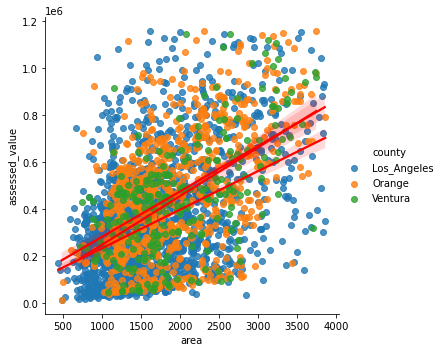

In [23]:
#implot on one graph to see the correlation between the size of the house and price in different counties
sns.lmplot(x="area", y="assessed_value",  hue ="county",data=train, line_kws={'color': 'red'})
plt.show()

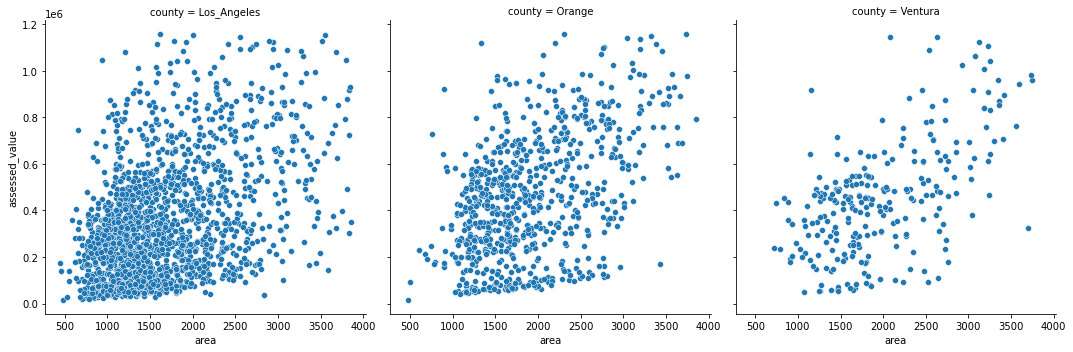

In [24]:
#relplot on three graphs to see the correlation between the size of the house and price in different counties
sns.relplot(x="area", y="assessed_value", data=train,  kind='scatter', height=5, col='county')
plt.show()

### takeaways
### - We can see that the size of the house has a high positive correlation with price of houses in different counties.
### - Therefore the smaller the size of houses the higher the lower the home value.
### - There high correlation for smaller houses in Los Angeles county that in Orange & Ventura

## 3.  Does the age of the house influence the price of the home?


### Statistical test

In [25]:
a = .05

### H0 : There is no relationship between age of house to home prices
### Ha : There is a relationship between age of house to home prices

In [26]:
# this statistical test takes in the age of houses to assessed value and 
# returns the correlation and p value to determine the statistical significance to alpha
x1= train["year_built"]
y1 = train["assessed_value"]
r1, p3 = stats.pearsonr(x1, y1)
print(f'r = {r1:.5f}')
print(f'p = {p3:.5f}')

if p<a:
    print(f"reject the null hypothesis")
else:
    print(f"reject the null hypothesis")

r = 0.29604
p = 0.00000
reject the null hypothesis


### Plots

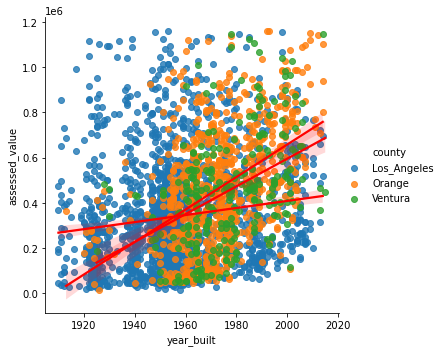

In [27]:
#implot on one graph to see the correlation between the age of the house and price in different counties
sns.lmplot(x="year_built", y="assessed_value",  hue ="county",data=train, line_kws={'color': 'red'})
plt.show()

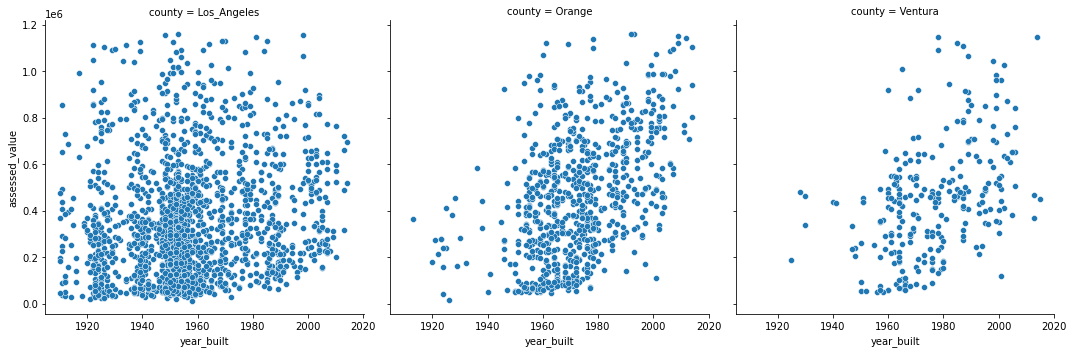

In [28]:
#relplot on three graphs to see the correlation between the age of the house and price in different counties
sns.relplot(x="year_built", y="assessed_value", data=train,  kind='scatter', height=5, col='county')
plt.show()

### takeaways
### - We can see that there is a high positive correlation on houses in Los Angeles county as they age compared to houses in Orange & Ventura counties.
### - On the other hand newer houses in Orange & Ventura counties are more expensive compared to Los Angeles county.

## 4. Does the location of the house influence the price of the home?

### Statistical test

In [29]:
a = .05

### H0 : There is no relationship between location of house to home prices
### Ha : There is a relationship between location of house to home prices

In [30]:
# this statistical test takes in the location of houses to assessed value and 
# returns the correlation and p value to determine the statistical significance to alpha
x2= train["county"].map({"Los_Angeles":0,"Orange":1,"Ventura":2})
y2 = train["assessed_value"]
r1, p3 = stats.pearsonr(x2, y2)
print(f'r = {r1:.5f}')
print(f'p = {p3:.5f}')

if p<a:
    print(f"reject the null hypothesis")
else:
    print(f"reject the null hypothesis")

r = 0.19941
p = 0.00000
reject the null hypothesis


### Plot

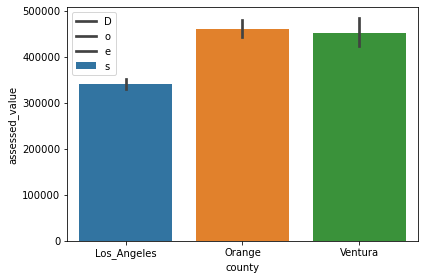

In [31]:
#barplot to check location of houses and price of homes
target = train.assessed_value
#train_drop = train.drop(columns=["area","assessed_value","year_built","county"])
train_drop = train.drop(columns=["bedrooms", "bathrooms", "area","year_built","assessed_value"])

# plot independent variables against dependent variables
for col in train_drop:
    sns.barplot(x=train_drop[col], y=target, data=train_drop)
    plt.ylabel('assessed_value')
    plt.xlabel(col)
    plt.legend("Does the location of house influence price of home?")
    plt.tight_layout()
    plt.show()

### takeaway
### - We can see that houses in Orange & Ventura counties are more expensive compared to houses in Los Angeles county

## Heatmap
### Which features have the highest correlations with tax_value?

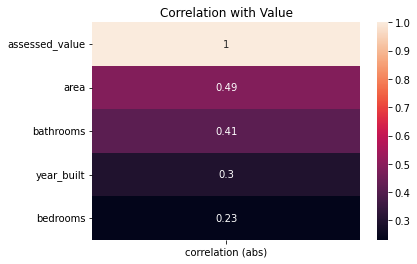

In [32]:
#visualize heatmap tax value correlation to various features
corr = pd.DataFrame(train.corr().abs().assessed_value).sort_values(by='assessed_value', ascending=False)
corr.columns = ['correlation (abs)']
sns.heatmap(corr, annot=True)
plt.title('Correlation with Value')
plt.show()


### takeaway
#### - We can see that the features that have the highest correlation to tax value of homes are area/size and bathrooms.

## Modeling & Evaluate

## Scaling

In [33]:
import sklearn.preprocessing

In [34]:
#Write function to scale data for zillow data
def scale_data(train, validate, test, features_to_scale):
    """Scales the 3 data splits using MinMax Scaler. 
    Takes in train, validate, and test data splits as well as a list of the features to scale. 
    Returns dataframe with scaled counterparts on as columns"""
    
    
    # Make the thing to train data only
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(train[features_to_scale])
    
    # Fit the thing with new column names with _scaled added on
    scaled_columns = [col+"_scaled" for col in features_to_scale]
    
    # Transform the separate datasets using the scaler learned from train
    scaled_train = scaler.transform(train[features_to_scale])
    scaled_validate = scaler.transform(validate[features_to_scale])
    scaled_test = scaler.transform(test[features_to_scale])
    
    # Apply the scaled data to the original unscaled data
    train_scaled = pd.concat([train, pd.DataFrame(scaled_train,index=train.index, columns = scaled_columns)],axis=1)
    validate_scaled = pd.concat([validate, pd.DataFrame(scaled_validate,index=validate.index, columns = scaled_columns)],axis=1)
    test_scaled = pd.concat([test, pd.DataFrame(scaled_test,index=test.index, columns = scaled_columns)],axis=1)

    return train_scaled, validate_scaled, test_scaled

In [35]:
features_to_scale = ["bedrooms","bathrooms","area"]

In [36]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, features_to_scale)


In [37]:
train_scaled

,bedrooms,bathrooms,area,assessed_value,year_built,county,bedrooms_scaled,bathrooms_scaled,area_scaled
45903,3.0,1.0,936.0,449000.0,1947.0,Los_Angeles,0.428571,0.2,0.145157
21951,3.0,1.0,1242.0,502233.0,1929.0,Los_Angeles,0.428571,0.2,0.234709
8637,3.0,1.5,1524.0,383119.0,1954.0,Orange,0.428571,0.3,0.317237
14763,3.0,3.0,1635.0,307538.0,1990.0,Orange,0.428571,0.6,0.349722
37559,4.0,2.0,1599.0,340693.0,1966.0,Orange,0.571429,0.4,0.339186
...,...,...,...,...,...,...,...,...,...
46626,3.0,2.0,1348.0,476345.0,1958.0,Orange,0.428571,0.4,0.265730
44785,3.0,2.0,1106.0,743766.0,1955.0,Los_Angeles,0.428571,0.4,0.194908
36890,3.0,2.5,1804.0,581287.0,2003.0,Orange,0.428571,0.5,0.399181
35598,3.0,2.0,1536.0,297097.0,1955.0,Los_Angeles,0.428571,0.4,0.320749


In [38]:
X_train_scaled = train_scaled[["bedrooms_scaled","bathrooms_scaled","area_scaled"]]
y_train = train.assessed_value
X_validate_scaled = validate_scaled[["bedrooms_scaled","bathrooms_scaled","area_scaled"]]
y_validate = validate.assessed_value
X_test_scaled = test_scaled[["bedrooms_scaled","bathrooms_scaled","area_scaled"]]
y_test = test.assessed_value


In [39]:
X_train_scaled.head()

,bedrooms_scaled,bathrooms_scaled,area_scaled
45903,0.428571,0.2,0.145157
21951,0.428571,0.2,0.234709
8637,0.428571,0.3,0.317237
14763,0.428571,0.6,0.349722
37559,0.571429,0.4,0.339186


In [40]:
columns = ["bedrooms","bathrooms","area"]

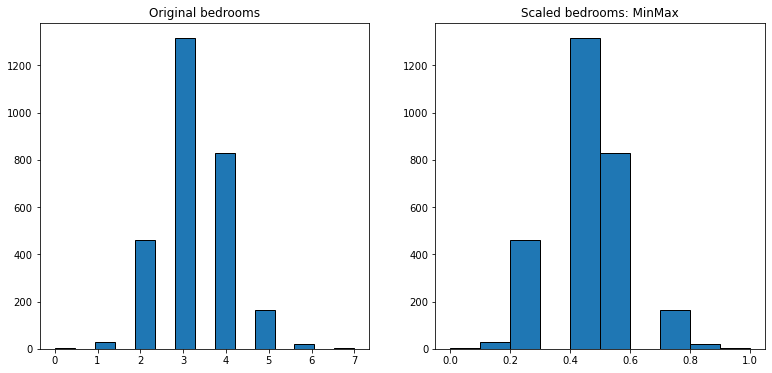

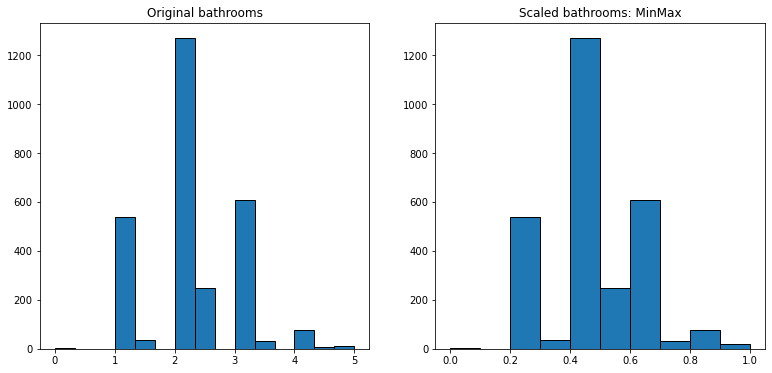

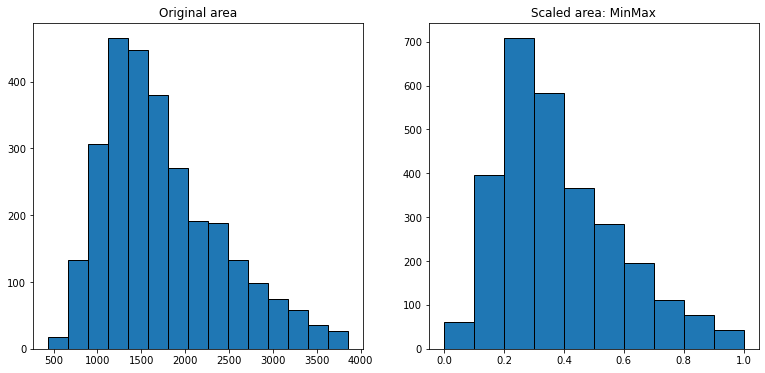

In [41]:
# Visualize scaling of data before & after scaling
for col in columns:
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(train[[col]])
    train_scaled = scaler.transform(train[[col]])
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=15, ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(train_scaled, bins=10, ec='black')
    plt.title(f'Scaled {col}: MinMax')
    plt.show()

In [42]:
#takeaways
# all the distributions bedrooms, bathrooms & area are close to normal distribution

### Calculate baseline
#### Calculate baseline based on mean and median and evaluate which has the lowest RMSE which will be used for our best model to beat.

In [43]:
#convert y_train and y_validate to dataframe
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_train.head()

,assessed_value
45903,449000.0
21951,502233.0
8637,383119.0
14763,307538.0
37559,340693.0


In [44]:
#calculate mean
baseline = df.assessed_value.mean()
baseline

382196.4075677511

In [45]:
#Create mean baseline model
y_train['baseline_mean_pred'] = y_train['assessed_value'].mean()
y_validate['baseline_mean_pred'] = y_validate['assessed_value'].mean()

#Create median baseline model
y_train['baseline_median_pred'] = y_train['assessed_value'].median()
y_validate['baseline_median_pred'] = y_validate['assessed_value'].median()

In [46]:
y_train.mean()

assessed_value          384119.48249
baseline_mean_pred      384119.48249
baseline_median_pred    337567.00000
dtype: float64

In [47]:
y_train.assessed_value.mean()

384119.4824902724

In [48]:
# we can now predict the mean for assessed value
assessed_value_mean = y_train.assessed_value.mean()
y_train['assessed_value_pred_mean'] = assessed_value_mean
y_validate['assessed_value_pred_mean'] = assessed_value_mean
#y_test['assessed_value_pred_mean'] = assessed_value_mean

In [49]:
# we can now predict the median for assessed value
assessed_value_median = y_train.assessed_value.median()
y_train['assessed_value_pred_median'] = assessed_value_median
y_validate['assessed_value_pred_median'] = assessed_value_median
y_test['assessed_value_pred_median'] = assessed_value_median

In [50]:
# Getting the RMSE assessed value_pred_mean

rmse_train = mean_squared_error(y_train.assessed_value, y_train.assessed_value_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.assessed_value, y_validate.assessed_value_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# Getting the RMSE taxvalue_pred_median
rmse_train = mean_squared_error(y_train.assessed_value, y_train.assessed_value_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.assessed_value, y_validate.assessed_value_pred_median)**(1/2)

print("\nRMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  256598.61 
Validate/Out-of-Sample:  252390.8

RMSE using Median
Train/In-Sample:  260787.23 
Validate/Out-of-Sample:  255637.63


In [51]:
# Takeaway
# From the above, we will use the mean since its the lowest

In [52]:
metric_df = pd.DataFrame(
data=[{
    'model': 'mean_baseline',
    'rmse_train': rmse_train, 
    'r^2_train':explained_variance_score(y_train.assessed_value,
                                           y_train.assessed_value_pred_mean)
}])

In [53]:
metric_df

,model,rmse_train,r^2_train
0,mean_baseline,260787.231323,0.0


### Plot Actual assessed value

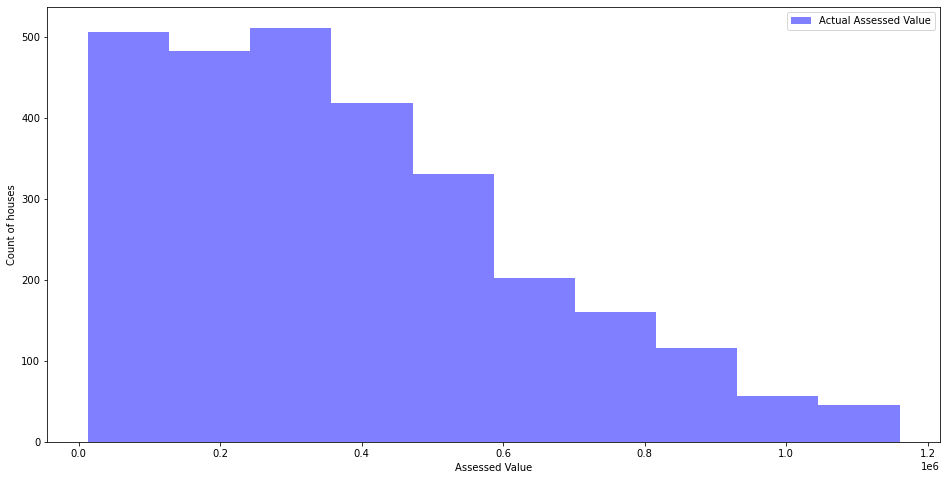

In [54]:
# plot to visualize Actual Assessed Value
plt.figure(figsize=(16,8))
plt.hist(y_train.assessed_value, color='blue', alpha=0.5, label='Actual Assessed Value')
plt.xlabel('Assessed Value')
plt.ylabel('Count of houses')
plt.legend()
plt.show()

## Regression Models

In [55]:
# from linear_model: LinearRegression (OLS), LassoLars, TweedieRegressor (Generalized Linear Model)
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor

from sklearn.preprocessing import PolynomialFeatures


### 1. LinearRegression (Ordinary Least Squares-OLS)


In [56]:
# create model using OLS
lm = LinearRegression()
#fit the model
lm.fit(X_train_scaled, y_train.assessed_value)
# predict train
y_train['assessed_value_pred_lm'] = lm.predict(X_train_scaled)
# evaluate rmse
rmse_train = mean_squared_error(y_train.assessed_value, y_train.assessed_value_pred_lm)**(1/2)
# predict validate
y_validate['assessed_value_pred_lm'] = lm.predict(X_validate_scaled)
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.assessed_value, y_validate.assessed_value_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for OLS using LinearRegression
Training/In-Sample:  222332.50306378497 
Validation/Out-of-Sample:  221199.34555789677


In [57]:
metric_df = metric_df.append(
{
    'model': 'OLS lm 1',
    'rmse_train': rmse_train, 
    'r^2_train':explained_variance_score(y_train.assessed_value,
                                           y_train.assessed_value_pred_lm)
}, ignore_index=True)


In [58]:
metric_df

,model,rmse_train,r^2_train
0,mean_baseline,260787.231323,0.000000
1,OLS lm 1,222332.503064,0.249247


### 2. LassoLar

In [59]:
# create the model
lars = LassoLars(alpha=1.0)

# fit the model
lars.fit(X_train_scaled, y_train.assessed_value)

# predict train
y_train['assessed_value_pred_lars'] = lars.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.assessed_value, y_train.assessed_value_pred_lars)**(1/2)

# predict validate
y_validate['assessed_value_pred_lars'] = lars.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.assessed_value, y_validate.assessed_value_pred_lars)**(1/2)

print("RMSE for LassoLars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for LassoLars
Training/In-Sample:  222332.54162863552 
Validation/Out-of-Sample:  221199.56947006122


In [60]:
metric_df = metric_df.append(
{
    'model': 'LassoLars alpha 1',
    'rmse_train': rmse_train, 
    'r^2_train':explained_variance_score(y_train.assessed_value,
                                           y_train.assessed_value_pred_lars)
}, ignore_index=True)

In [61]:
metric_df

,model,rmse_train,r^2_train
0,mean_baseline,260787.231323,0.000000
1,OLS lm 1,222332.503064,0.249247
2,LassoLars alpha 1,222332.541629,0.249246


### 3. TweedieRegressor (GLM)


In [62]:
# create the model 
glm = TweedieRegressor(power=1, alpha=0)

# fit the model
glm.fit(X_train_scaled, y_train.assessed_value)

# predict train
y_train['assessed_value_pred_glm'] = glm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.assessed_value, y_train.assessed_value_pred_glm)**(1/2)

# predict validate
y_validate['assessed_value_pred_glm'] = glm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.assessed_value, y_validate.assessed_value_pred_glm)**(1/2)

print("RMSE for GLM  using Tweedie\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM  using Tweedie
Training/In-Sample:  223001.6719042905 
Validation/Out-of-Sample:  222066.07317764885


In [63]:
metric_df = metric_df.append(
    {
    'model': 'GLM Model power 1',
    'rmse_train': rmse_train,
    'r^2_train': explained_variance_score(y_train.assessed_value, y_train.assessed_value_pred_glm)}, ignore_index=True)

In [64]:
metric_df

,model,rmse_train,r^2_train
0,mean_baseline,260787.231323,0.000000
1,OLS lm 1,222332.503064,0.249247
2,LassoLars alpha 1,222332.541629,0.249246
3,GLM Model power 1,223001.671904,0.244721


### 4. Polynomial Regression

In [65]:
# making the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)



# create model using OLS
lm = LinearRegression()
#fit the model
lm.fit(X_train_degree2, y_train.assessed_value)
# predict train
y_train['assessed_value_pred_pf'] = lm.predict(X_train_degree2)
# evaluate rmse
rmse_train = mean_squared_error(y_train.assessed_value, y_train.assessed_value_pred_pf)**(1/2)
# predict validate
y_validate['assessed_value_pred_pf'] = lm.predict(X_validate_degree2)
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.assessed_value, y_validate.assessed_value_pred_pf)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  222165.48668502603 
Validation/Out-of-Sample:  221143.45089921783


In [66]:
metric_df = metric_df.append(
    {
    'model': 'Polynomial Model',
    'rmse_train': rmse_train,
    'r^2_train': explained_variance_score(y_train.assessed_value, y_train.assessed_value_pred_pf)}, ignore_index=True)
metric_df


,model,rmse_train,r^2_train
0,mean_baseline,260787.231323,0.000000
1,OLS lm 1,222332.503064,0.249247
2,LassoLars alpha 1,222332.541629,0.249246
3,GLM Model power 1,223001.671904,0.244721
4,Polynomial Model,222165.486685,0.250374


In [67]:
#takeaway
# Polynomial seems to be the best model

# Top three modells
# 1. Polynomial
# 2. OLS
# 3. LassoLars

### Evaluate
### Plotting Actual vs. Predicted Values

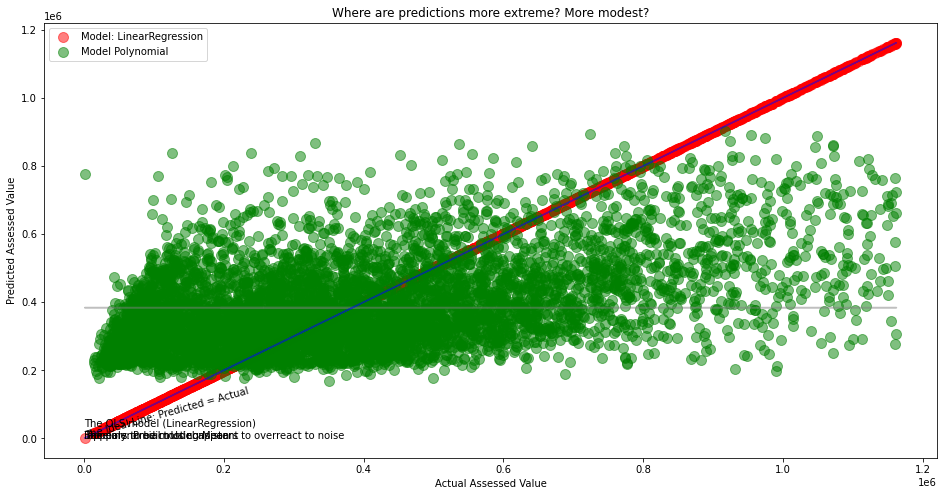

In [68]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.assessed_value, y_validate.assessed_value_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.assessed_value, y_validate.assessed_value, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.assessed_value, y_validate.assessed_value, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
# plt.scatter(y_validate.assessed_value, y_validate.assessed_value_pred_glm, 
#             alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.assessed_value, y_validate.assessed_value_pred_pf, 
            alpha=.5, color="green", s=100, label="Model Polynomial")
plt.legend()
plt.xlabel("Actual Assessed Value")
plt.ylabel("Predicted Assessed Value")
plt.title("Where are predictions more extreme? More modest?")
plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

### Residual Plots: Plotting the Errors in Predictions

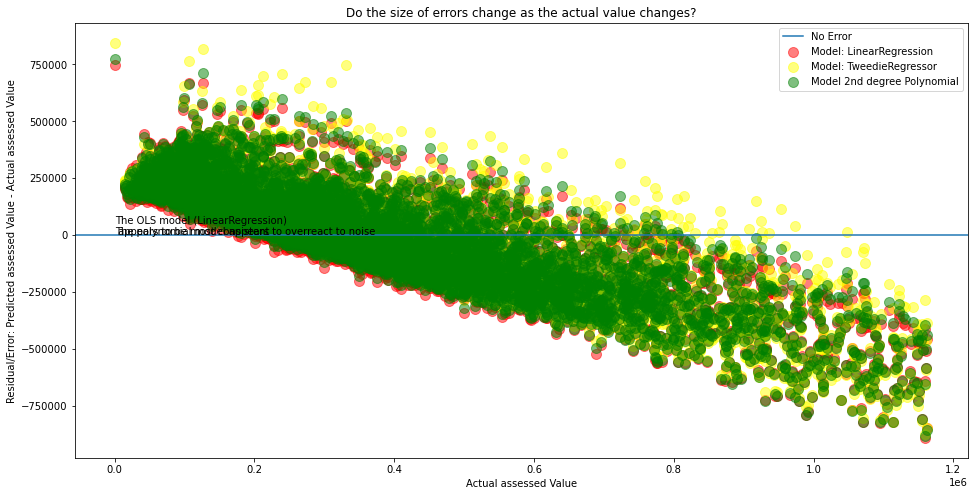

In [63]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.assessed_value, y_validate.assessed_value_pred_lm - y_validate.assessed_value, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.assessed_value, y_validate.assessed_value_pred_glm - y_validate.assessed_value, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.assessed_value, y_validate.assessed_value_pred_pf - y_validate.assessed_value, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual assessed Value")
plt.ylabel("Residual/Error: Predicted assessed Value - Actual assessed Value")
plt.title("Do the size of errors change as the actual value changes?")
plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

## Histogram

In [ ]:
# Top three modells
# 1. Polynomial
# 2. OLS
# 3. LassoLars

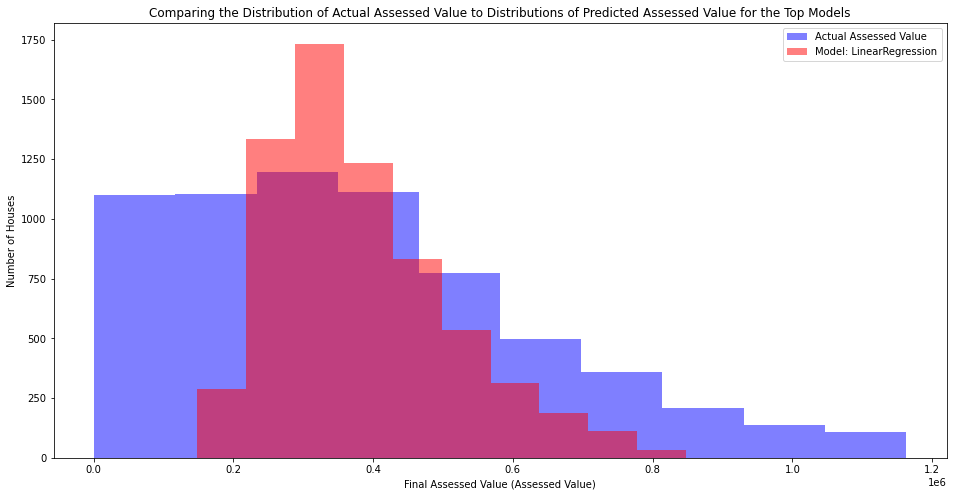

In [79]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.assessed_value, color='blue', alpha=.5, label="Actual Assessed Value")
plt.hist(y_validate.assessed_value_pred_lm, color='red', alpha=.5, label="Model: Polynomial Regression")
#plt.hist(y_validate.Assessed_value_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
#plt.hist(y_validate.assessed_value_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Final Assessed Value (Assessed Value)")
plt.ylabel("Number of Houses")
plt.title("Comparing the Distribution of Actual Assessed Value to Distributions of Predicted Assessed Value for the Top Models")
plt.legend()
plt.show()

In [69]:
# final steps before putting into production:
# select best model:
# assess on test set


In [70]:
# Polynomial was my best model, so I will utilize this to evaluate results on my test set
